In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('WatermarkRobustness')] + "WatermarkRobustness/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_blackbox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_blackbox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

[1/5] (logo) Blackbox Attack: Loading MNIST data
      Owner data: 30000 Attacker Data: 30000
     Found cached training data for owner_data3000030000
     Found cached training data for attacker_data3000030000
[2/5] Generating ASIACCS watermarked images: Train(2000) Test(1000)
Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


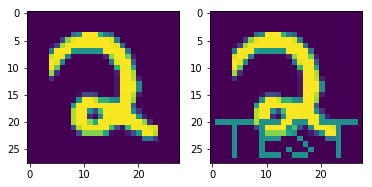

Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


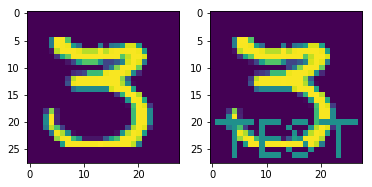

[3/5] Training the original model and embedding the watermark
Instructions for updating:
Use tf.cast instead.
      Skipping embedding of wm and use a cached entry instead
30000/30000 [==============================] - 12s 395us/step
    Done! Original models accuracy on attackers data: 0.986
[4/5] Labeling the attackers data with the original model
[5/5] Training the surrogate model
Train on 30000 samples, validate on 10000 samples
Epoch 1/15
30000/30000 [==============================] - 35s 1ms/step - loss: 0.1906 - acc: 0.9387 - val_loss: 0.0719 - val_acc: 0.9782
=> Time: : 34.79345440864563
=> watermark_new_val: 0.093
Confusion matrix, without normalization


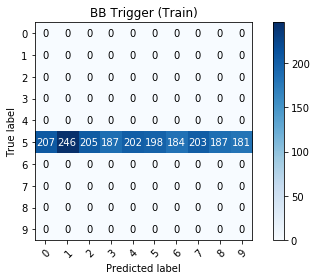

Confusion matrix, without normalization


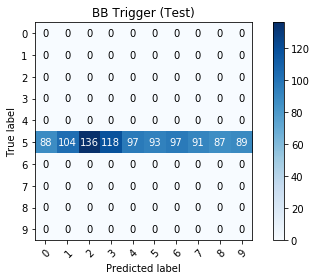

=> watermark_val: 0.099
Epoch 2/15
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0558 - acc: 0.9835 - val_loss: 0.0537 - val_acc: 0.9831
=> Time: : 35.632521867752075
=> watermark_new_val: 0.088
Confusion matrix, without normalization


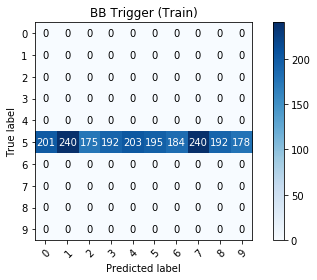

Confusion matrix, without normalization


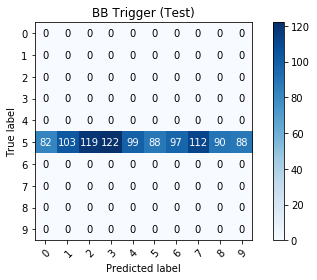

=> watermark_val: 0.0975
Epoch 3/15
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0418 - acc: 0.9894 - val_loss: 0.0400 - val_acc: 0.9867
=> Time: : 35.64500403404236
=> watermark_new_val: 0.091
Confusion matrix, without normalization


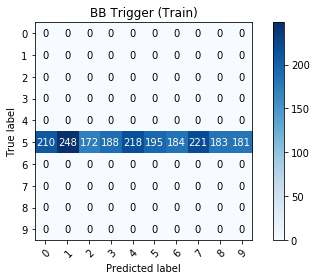

Confusion matrix, without normalization


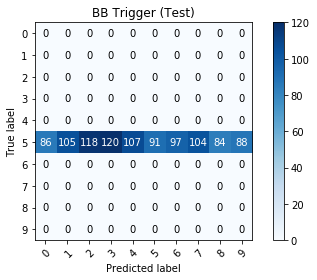

=> watermark_val: 0.0975
Epoch 4/15
30000/30000 [==============================] - 35s 1ms/step - loss: 0.0357 - acc: 0.9923 - val_loss: 0.0442 - val_acc: 0.9859
=> Time: : 35.14492130279541
=> watermark_new_val: 0.089
Confusion matrix, without normalization


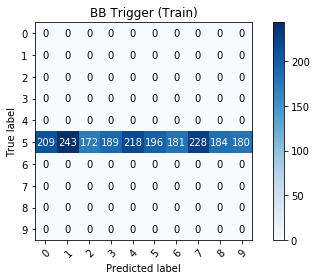

Confusion matrix, without normalization


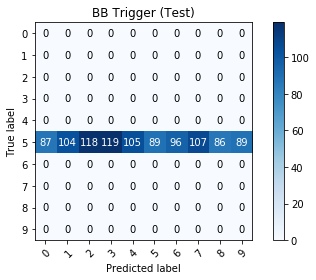

=> watermark_val: 0.098
Epoch 5/15
30000/30000 [==============================] - 38s 1ms/step - loss: 0.0350 - acc: 0.9917 - val_loss: 0.0419 - val_acc: 0.9861
=> Time: : 38.00035572052002
=> watermark_new_val: 0.09
Confusion matrix, without normalization


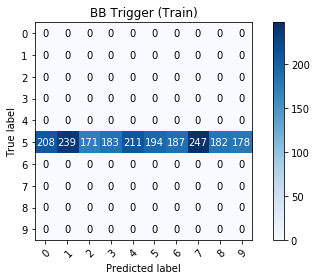

Confusion matrix, without normalization


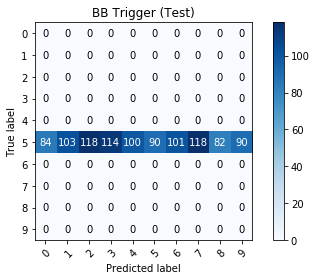

=> watermark_val: 0.097
Epoch 6/15
30000/30000 [==============================] - 37s 1ms/step - loss: 0.0323 - acc: 0.9939 - val_loss: 0.0395 - val_acc: 0.9872
=> Time: : 37.16792893409729
=> watermark_new_val: 0.087
Confusion matrix, without normalization


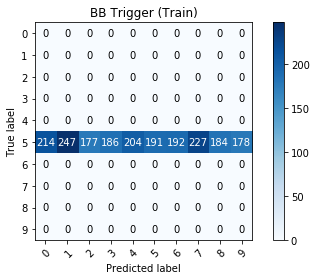

Confusion matrix, without normalization


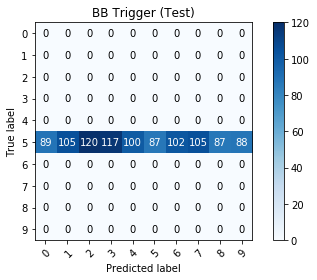

=> watermark_val: 0.0955


In [2]:
surr_model, all_history = asiaccs_blackbox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     model=get_lenet_model_for_mnist(),  # Model specification for wm_embedding
     surrogate_model=get_lenet_model_for_mnist(),
     wm_type="logo",
     owner_data_size=30000,
     total_owner_data_size=30000,
     key_length=2000,
     key_length_test=1000,
     attacker_data_size=30000,
     total_attacker_data_size=30000,
     epochs_embed=20,
     epochs_surr=15,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_logo_mnist_3000",
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
3.5270056327184043
[0.43506038983662926, 0.8841386040051779, 1.3277944842974345, 1.767910083134969, 2.2123329520225523, 2.651489055156708, 3.0910160541534424, 3.5270056327184043, 4.106896539529165, 4.700771903991699, 5.294855304559072, 5.880603992938996, 6.513943254947662, 7.133408737182617]


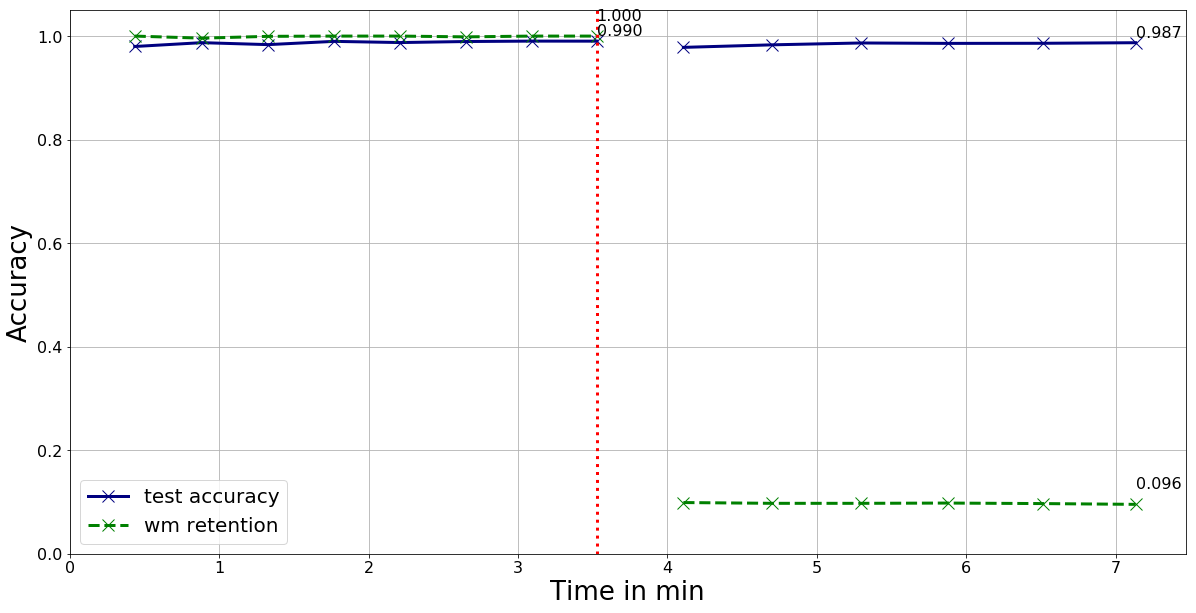

In [3]:
plot_blackbox(all_history)